In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys

In [2]:
import statsmodels.api as sm

In [3]:
def data_loader():
    path_df = sys.path[0]+'/ETHUSD_2021_minute.csv'
    df = pd.read_csv(path_df, skiprows=1, parse_dates=[
                     'date'], index_col=['date'])
    df.sort_values(by=['date'], inplace=True, ascending=True)
    del df['unix']
    del df['symbol']
    del df['Volume ETH']
    df.rename({'Volume USD': 'volume'}, axis=1, inplace=True)
    return(df)

In [4]:
df = data_loader()

In [5]:
df.head()

,open,high,low,close,volume
date,,,,,
2021-01-01 00:01:00,738.63,740.50,738.63,740.50,11147.529979
2021-01-01 00:02:00,739.02,739.02,739.02,739.02,43.164436
2021-01-01 00:03:00,739.02,739.02,739.02,739.02,0.000000
2021-01-01 00:04:00,738.31,738.60,738.31,738.60,26700.411434
2021-01-01 00:05:00,738.28,738.28,736.81,736.81,27394.208503


## Hodrick-Prescott filter with Statsmodels
The Hodrick-Prescott filter separates a time-series  y_t  into a trend  τ_t and a cyclical component  ζt

$y_t = \tau_t + \zeta_t$

The components are determined by minimizing the following quadratic loss function

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

In [6]:
data_cycle, data_trend = sm.tsa.filters.hpfilter(df['close'])

# Price decomposition

Text(0, 0.5, 'ETH vs USD')

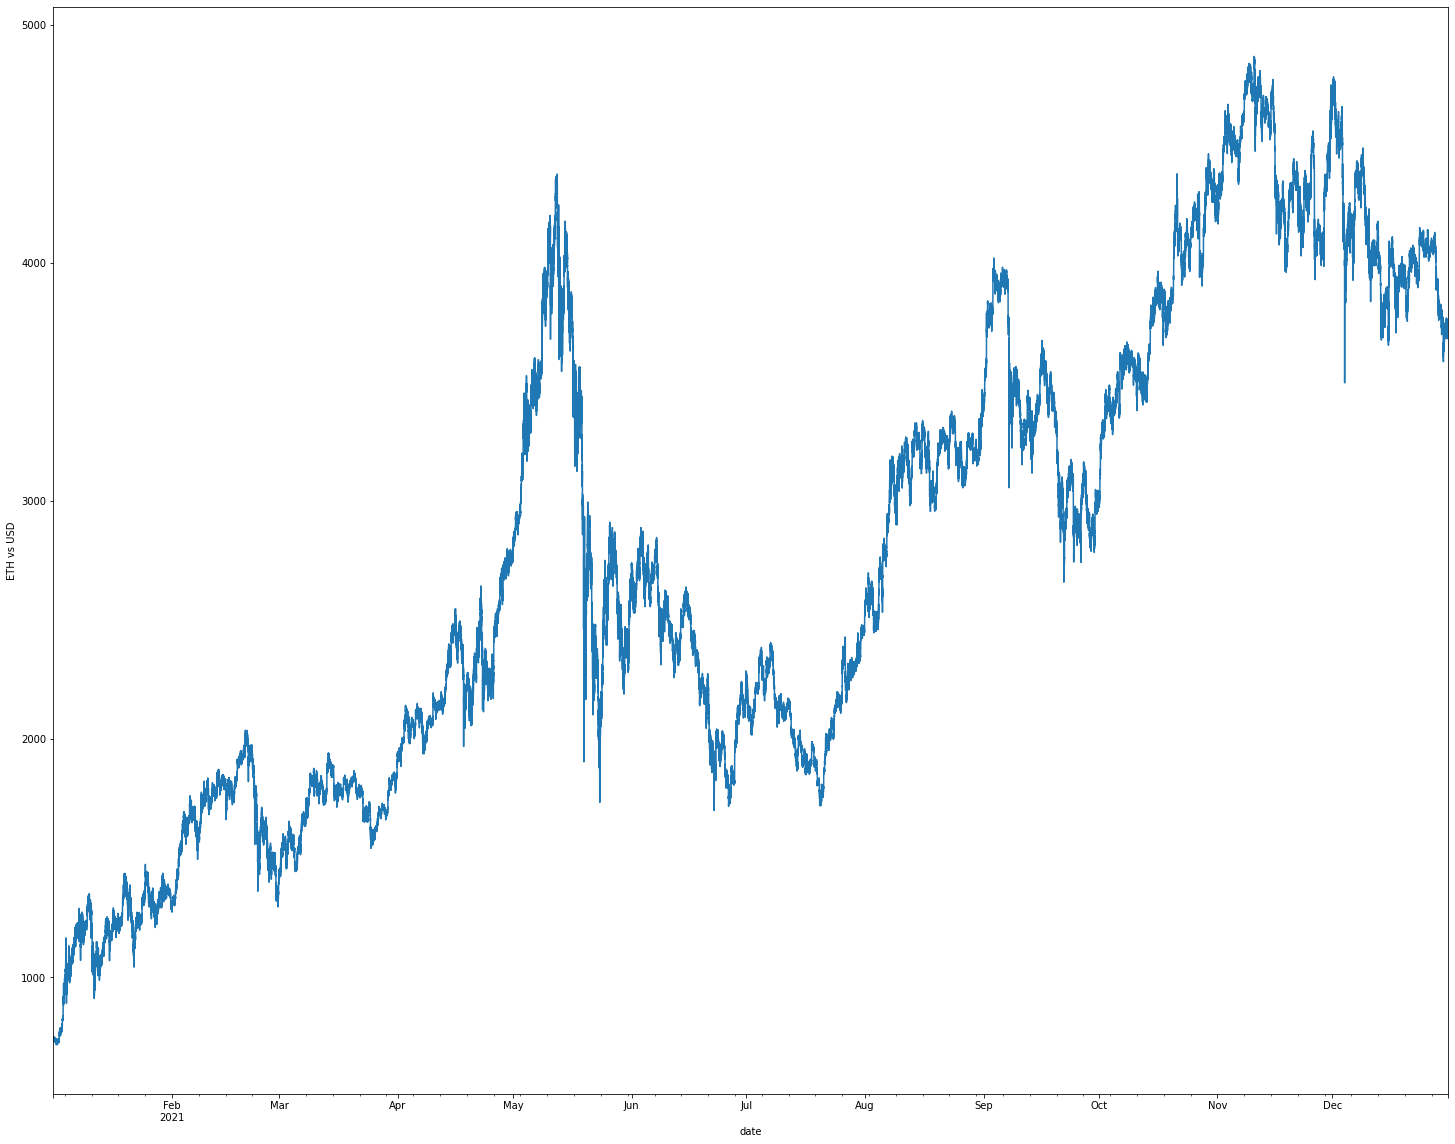

In [7]:
df['close'].plot(figsize=(25,20))
plt.ylabel("ETH vs USD")

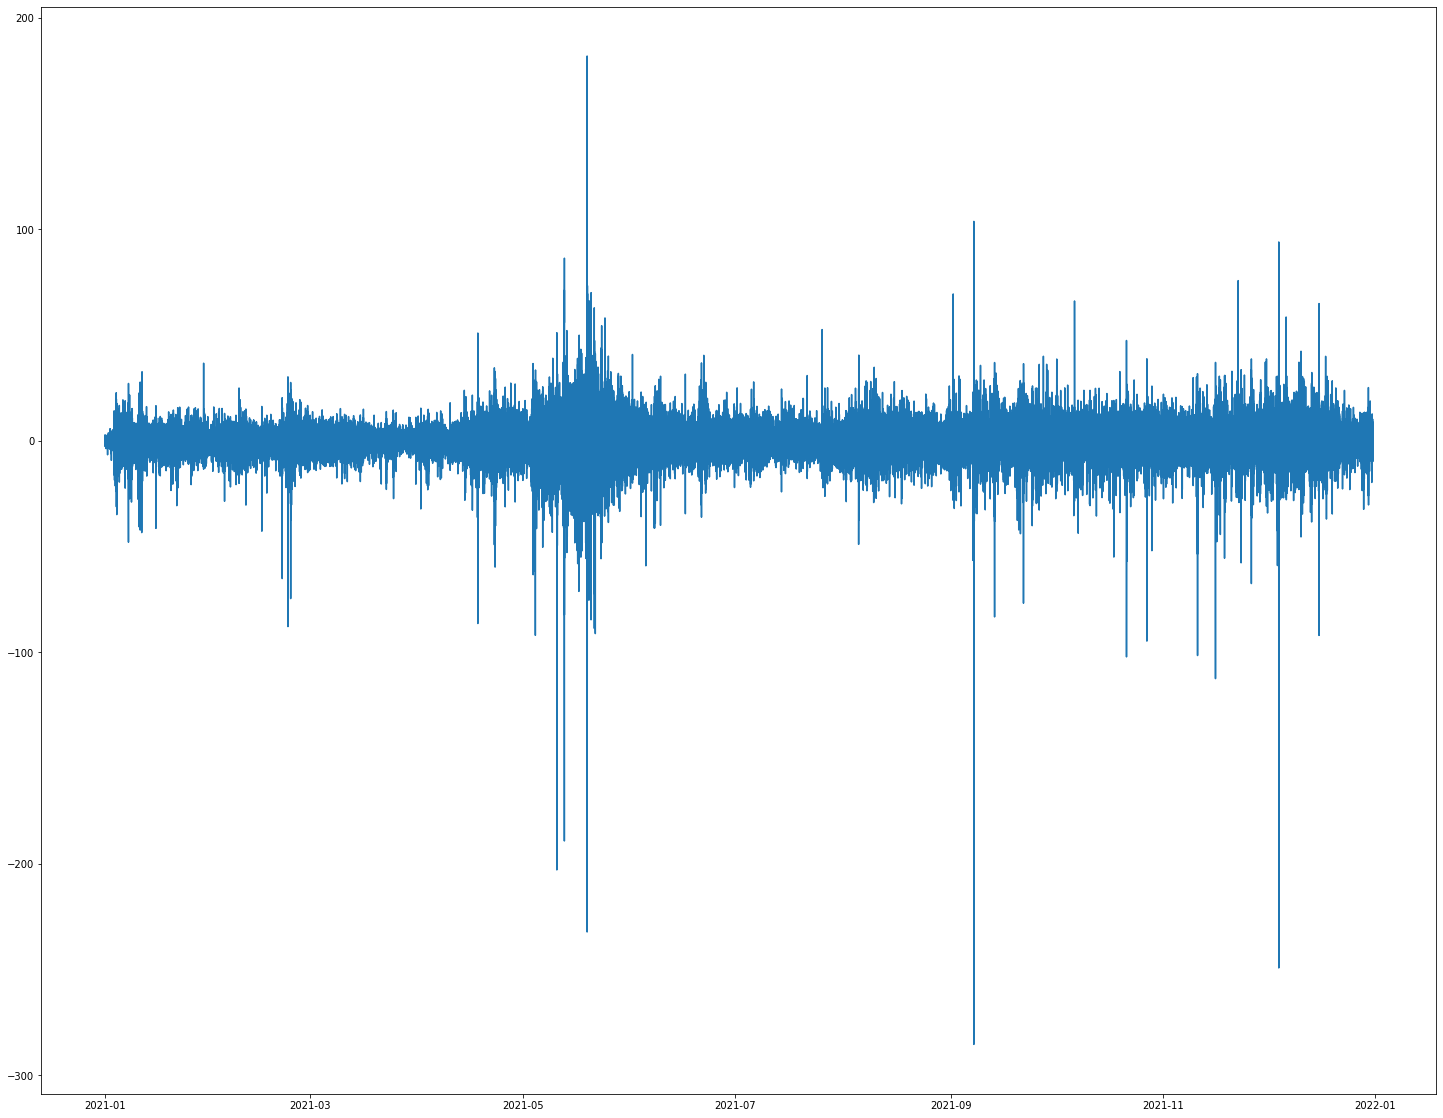

In [8]:
plt.figure(figsize=(25,20))
plt.plot(data_cycle)

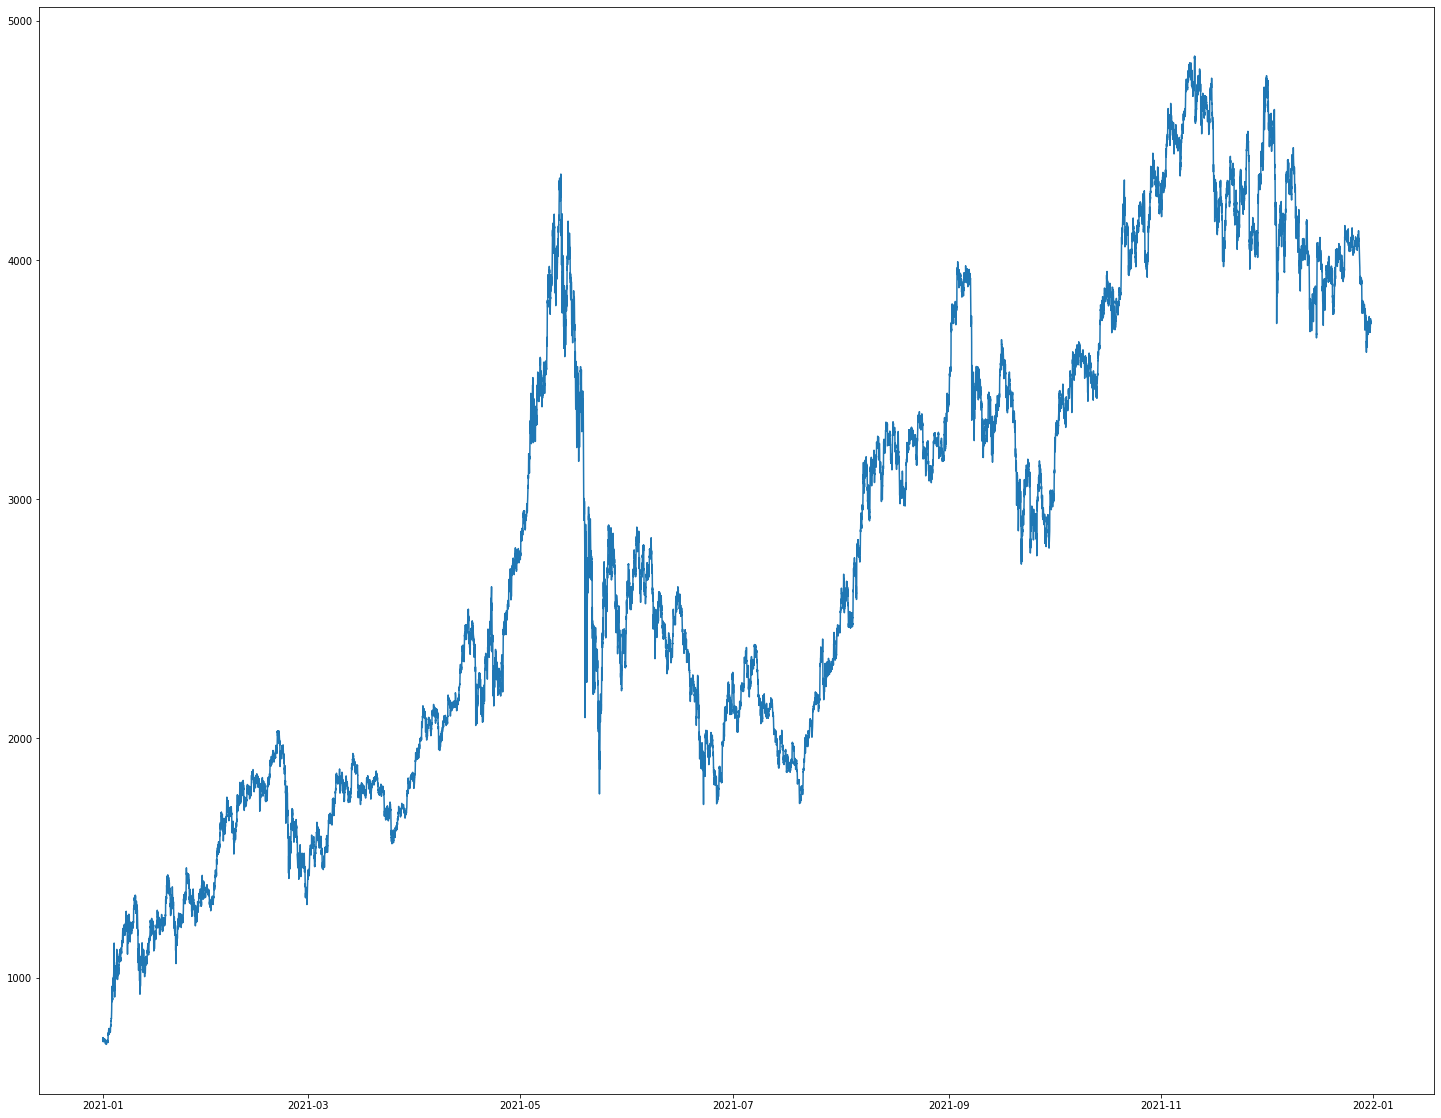

In [9]:
plt.figure(figsize=(25,20))
plt.plot(data_trend)

In [10]:
df["trend"] = data_trend

<AxesSubplot:xlabel='date'>

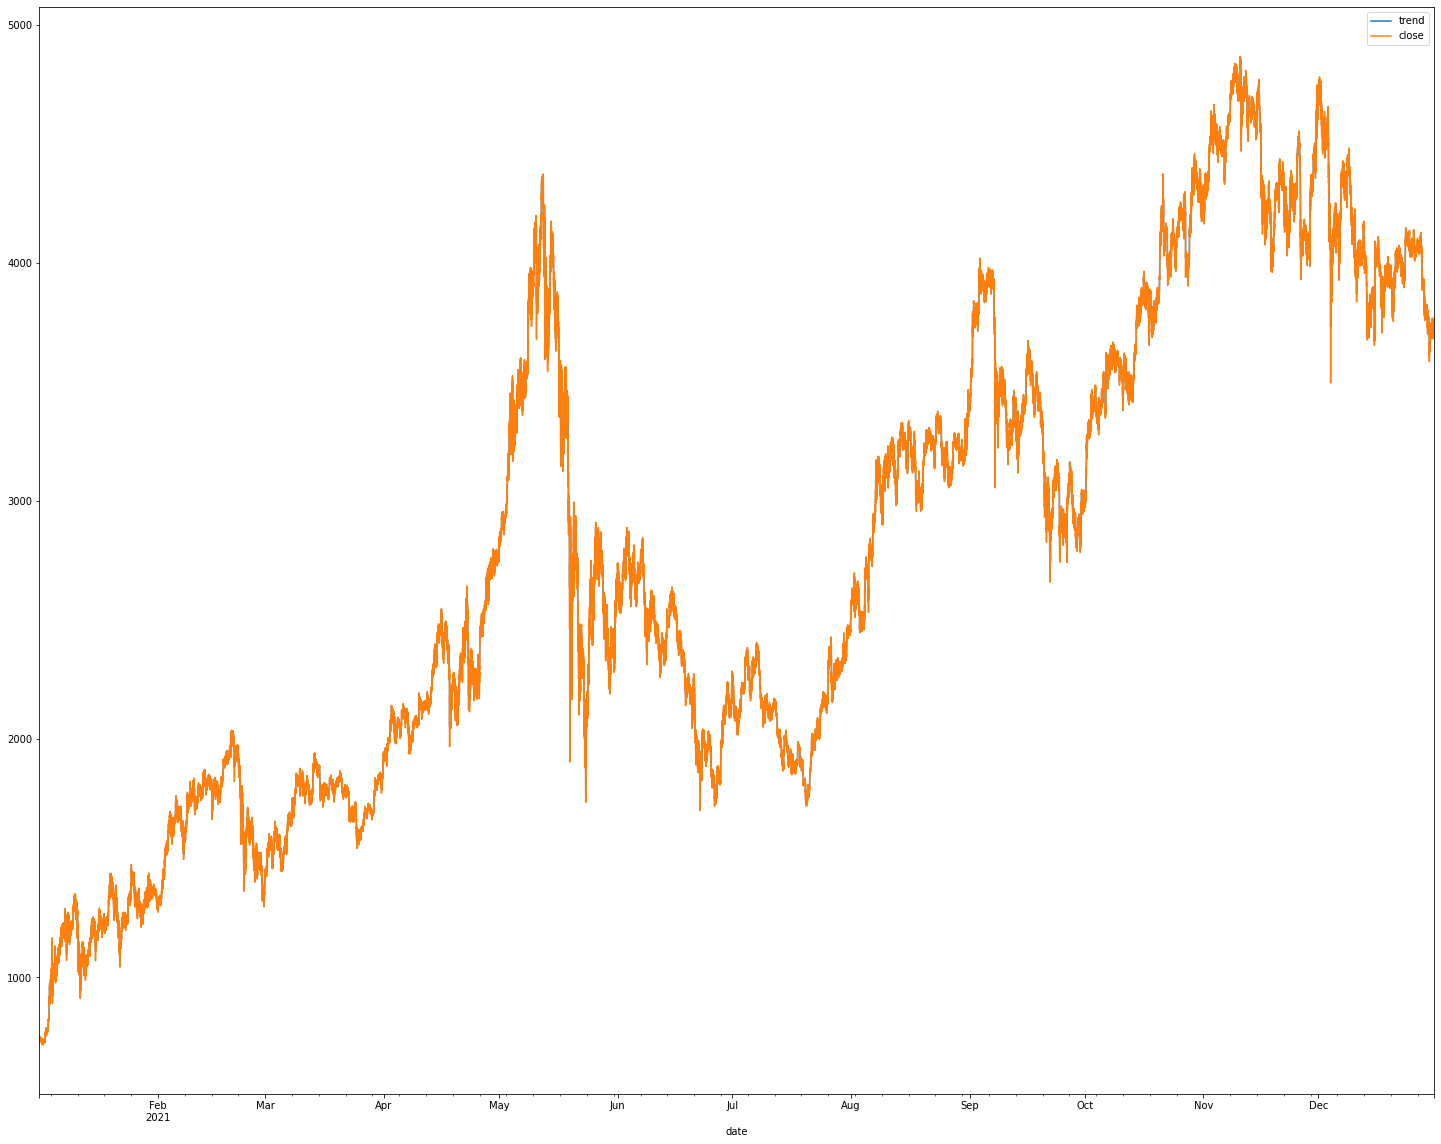

In [11]:
df[['trend','close']].plot(figsize=(25, 20))

## Volume decomposition

In [12]:
data_cycle, data_trend = sm.tsa.filters.hpfilter(df['volume'])

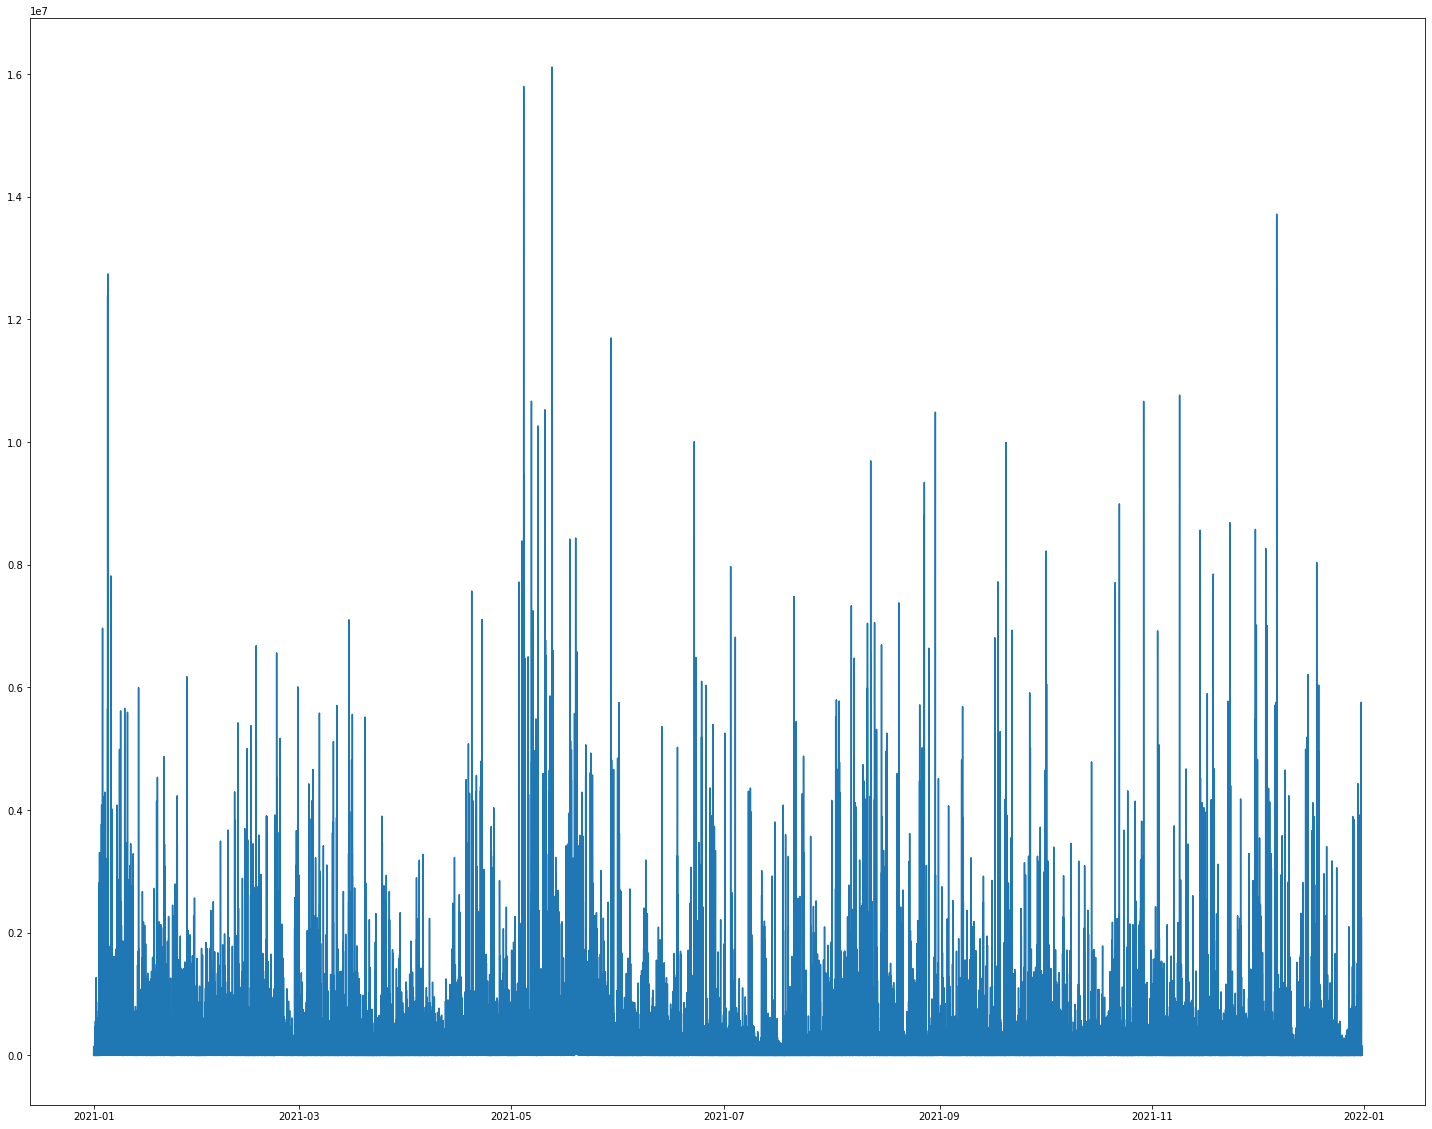

In [13]:
plt.figure(figsize=(25,20))
plt.plot(df['volume'])

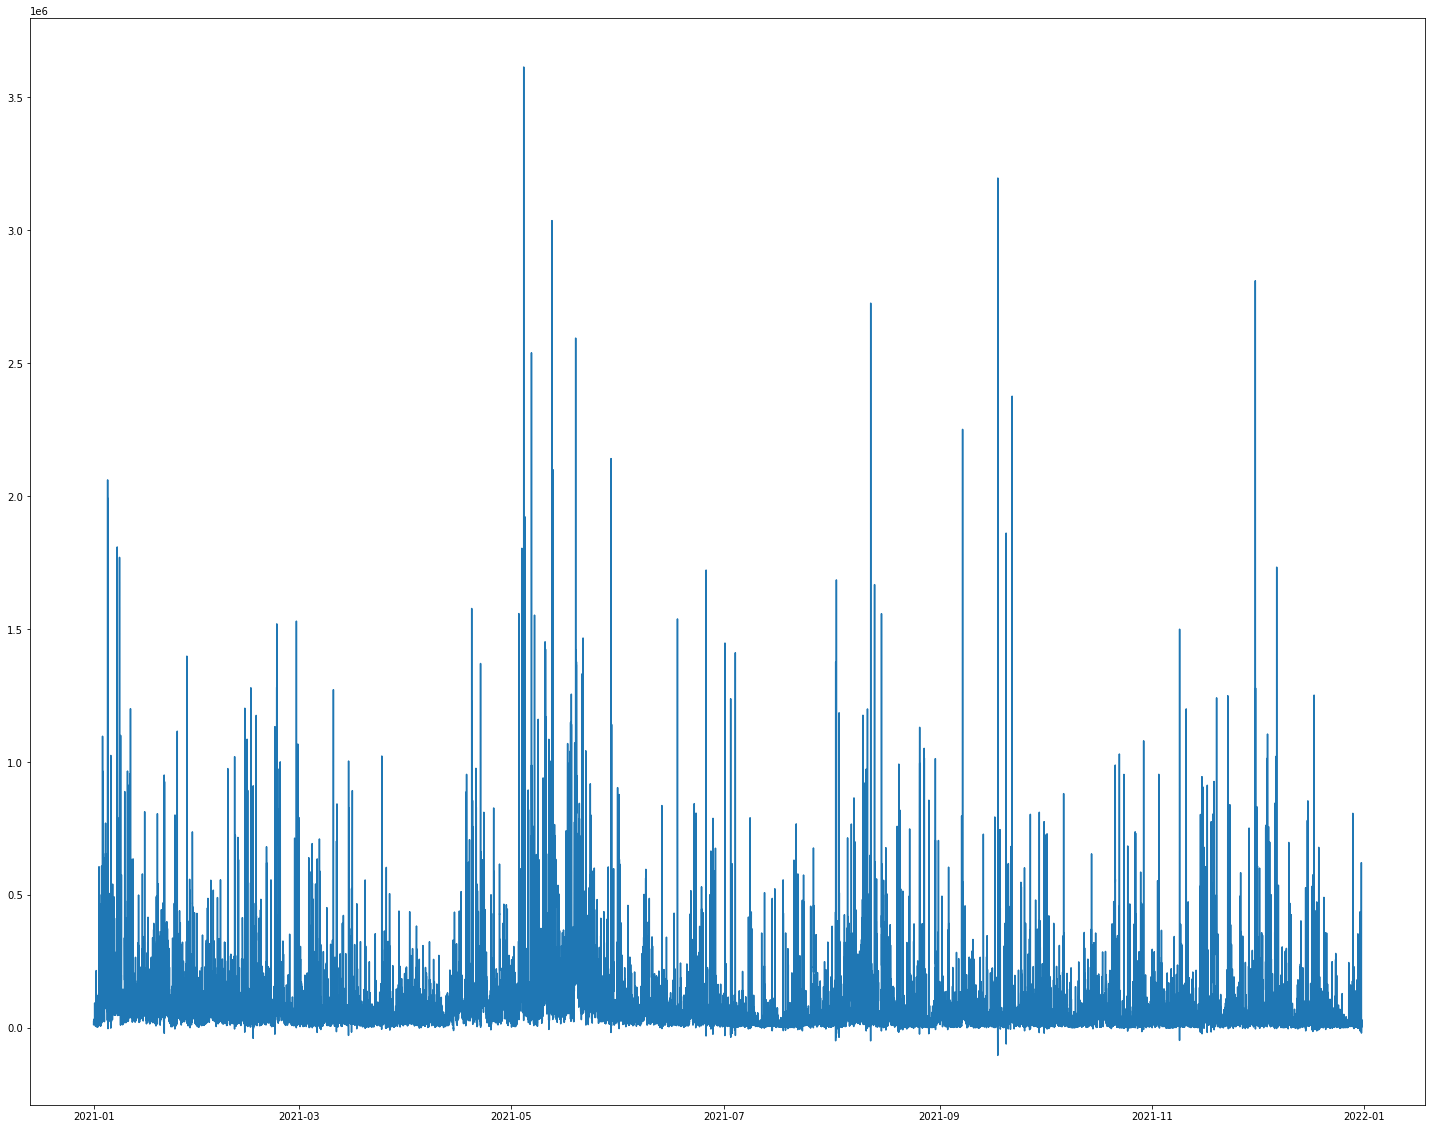

In [14]:
plt.figure(figsize=(25,20))
plt.plot(data_trend)

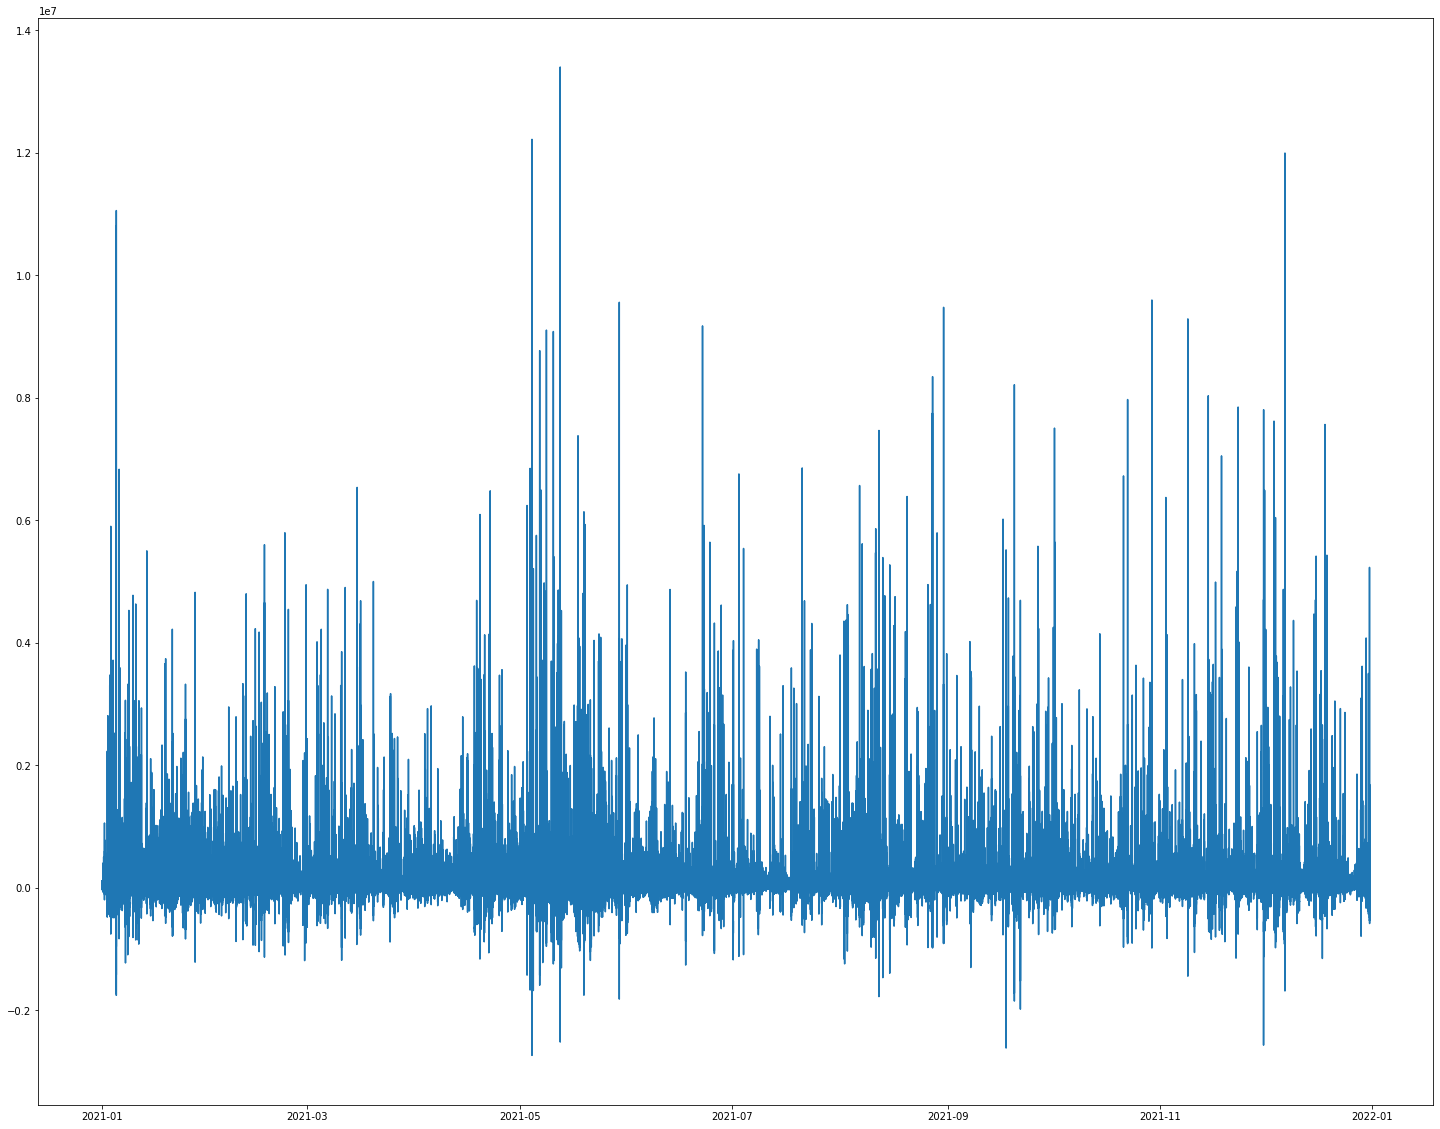

In [15]:
plt.figure(figsize=(25,20))
plt.plot(data_cycle)